In [1]:
# Importing Libraries 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd # pandas to create small dataframes 
import datetime     # Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np #Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns #Plots
from matplotlib import rcParams #Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans #Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import pdb
import pickle

In [2]:
import networkx as nx

In [3]:
%%time
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU times: user 42.6 ms, sys: 9.84 ms, total: 52.5 ms
Wall time: 3.76 s


In [4]:
traincsv = pd.read_csv('/content/drive/MyDrive/Case Studies/Facebook/data/train.csv') # loading the data

traincsv.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html 

* returns Datframe of same size in form of True and False 


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html 

* Return whether any element is True, potentially over an axis

In [5]:
print(traincsv.info())
print("NAN values -->",traincsv[traincsv.isna().any(1)]) # checking for nan values along column,like whole row then next row and then next.

print("Number of duplicate entries: ",sum(traincsv.duplicated())) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB
None
NAN values --> Empty DataFrame
Columns: [source_node, destination_node]
Index: []
Number of duplicate entries:  0


* No NAN values and duplicate entries are present

In [5]:
%%time 

# will take around 1 min 13 sec.
# reading graph

if not os.path.isfile('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_woheader.csv'): # woheader means without header.

    traincsv.to_csv('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_woheader.csv',header = False,index = False)

    print("saved the graph into file") # saving without header so that we can read it using edglist and it requires only list of edges.

else:
    
    g = nx.read_edgelist('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)


CPU times: user 1min 5s, sys: 2.71 s, total: 1min 8s
Wall time: 1min 8s


In [7]:
print(nx.info(g))

DiGraph with 1862220 nodes and 9437519 edges


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_woheader.csv')

data.head() # let's see how DataFrame would look like without Header and Index

,1,690569
0,1,315892
1,1,189226
2,2,834328
3,2,1615927
4,2,1194519


> Displaying a sub graph

https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html

In [9]:
if not os.path.isfile('/content/drive/MyDrive/Data sets/train_woheader_sample.csv'):

    sample = pd.read_csv('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_woheader.csv', nrows = 50)
    
    sample.to_csv('/content/drive/MyDrive/Data sets/train_woheader_sample.csv',header = False,index = False) # saving 50 sample of edges without header
    subsample = pd.read_csv('/content/drive/MyDrive/Data sets/train_woheader_sample.csv')

    print(subsample.head())

In [10]:
subgraph = nx.read_edgelist('/content/drive/MyDrive/Data sets/train_woheader_sample.csv',create_using = nx.DiGraph(),nodetype = int) 

print( nx.info(subgraph) )

DiGraph with 0 nodes and 0 edges


* This happens because we stores edges in CSV files so and as the name suggest comma separated values Hence delimiter "," should be used for correct loading of the edges.

In [11]:
# creating a small subgraph.

subgraph = nx.read_edgelist('/content/drive/MyDrive/Data sets/train_woheader_sample.csv',delimiter=',',create_using = nx.DiGraph(),nodetype = int) 

print( nx.info(subgraph) )

DiGraph with 66 nodes and 50 edges



**Fruchterman-Reingold force-directed algorithm**

purpose is to position the nodes of a graph in two-dimensional or three-dimensional space so that all the edges are of more or less equal length and there are as few crossing edges as possible

In [12]:
pos = nx.spring_layout(subgraph) # Position nodes using Fruchterman-Reingold force-directed algorithm.

# spring_layout returns a dictionary of positions keyed by node.
# for node, position in pos.items():
    # print(node,"-->",position)

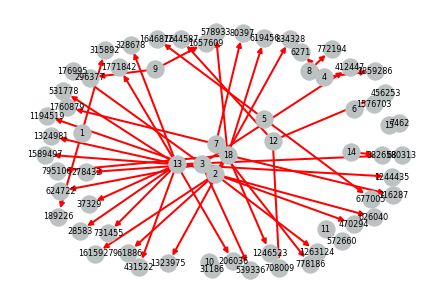

In [13]:
nx.draw(subgraph,pos,node_color = '#bcc2c2',edge_color = 'red',width = 2,edge_cmap = plt.cm.cool,with_labels = True,font_color = 'black',font_size = 8 )

# Colormap for mapping intensities of edges.

# 1. Exploratory Data Analysis

In [14]:
# No of Unique persons 
print("The number of unique persons",len(g.nodes()))
# remeber g is contains our whole graph instead of subgrah we loaded it in the very begining .

The number of unique persons 1862220


## 1.1 No of followers for each person

In [15]:
print(list(subgraph.in_degree())[:3]) # printing in-degree of last threee nodes in a subgraph

[(1, 0), (315892, 1), (189226, 1)]


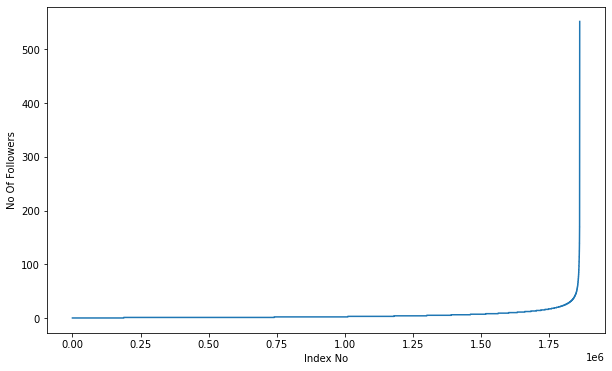

In [16]:
# In-degree of a vertex/node is nothing but number of followers of a user.
indegree_dist = list(dict(g.in_degree()).values())

indegree_dist.sort() # sorting the indegree in Ascending order by def.

plt.figure( figsize = (10,6) )
plt.plot(indegree_dist)

plt.xlabel('Index No')
plt.ylabel('No Of Followers')

plt.show()

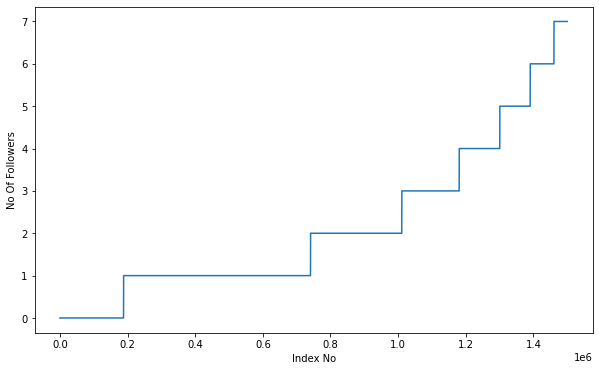

In [17]:
# let's zoom in the curve 
indegree_dist = list(dict(g.in_degree()).values())

indegree_dist.sort()

plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000]) # checking the In-degree till 1.5m users 

plt.xlabel('Index No')
plt.ylabel('No Of Followers')

plt.show()

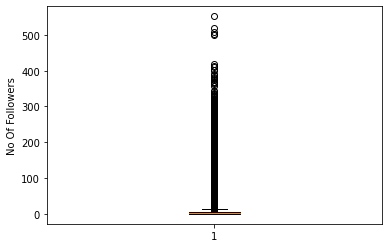

In [18]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')

plt.show()

* Box plot is showing that there are very less number of users which has followers > 500 

In [19]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


99% of Users have 40 followers only.

In [20]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


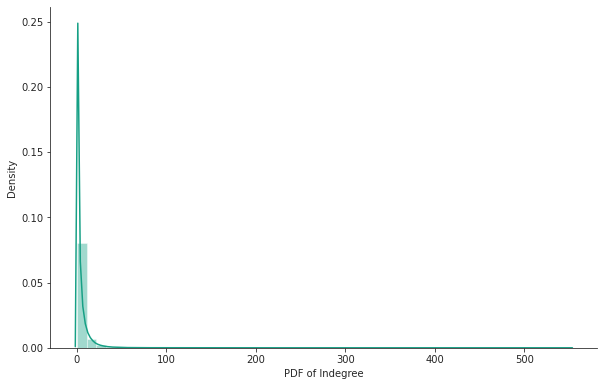

In [21]:
%matplotlib inline

sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(9.8, 6.27)

sns.distplot(indegree_dist, color = '#16A085') # distribution plot to check the distribution of indegree.

plt.xlabel('PDF of Indegree')
sns.despine()

plt.show()

## 1.2 No of people each person is following

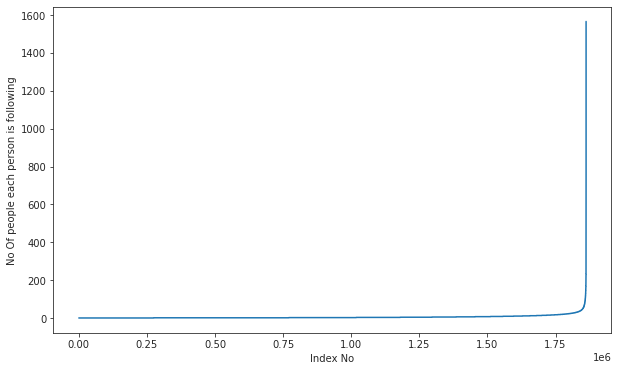

In [22]:
outdegree_dist = list(dict(g.out_degree()).values())

outdegree_dist.sort()

plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)

plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')

plt.show()

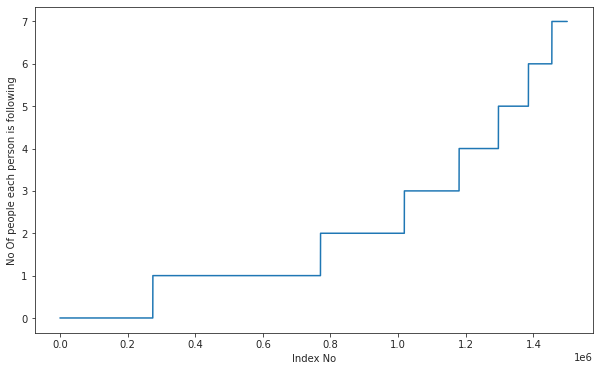

In [23]:
indegree_dist = list(dict(g.in_degree()).values())

indegree_dist.sort()

plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])

plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')

plt.show()

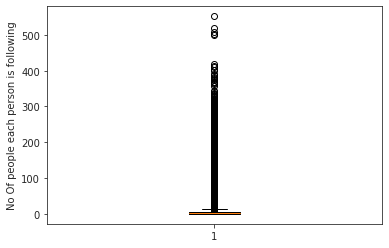

In [24]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of people each person is following')

plt.show()

* Not Many users are following more than 500 users.

In [25]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [26]:
### 99-100 percentile

for i in range(10,110,10):
    print(99 + (i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


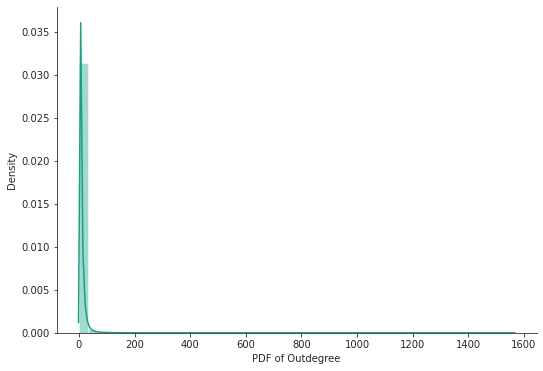

In [27]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(8.6, 5.99)

sns.distplot(outdegree_dist, color='#16A085')

plt.xlabel('PDF of Outdegree')
sns.despine()

In [28]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [29]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


In [30]:
count = 0

for i in g.nodes(): # g.nodes() will return total number of nodes

    if len(list(g.predecessors(i))) == 0 : # g.predecessors() will give all the followers of a node.

        if len(list(g.successors(i))) == 0: # g.successors() will return all the folloeing of a node.
            count += 1

print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


## 1.3 both followers + following 

In [31]:
from collections import Counter

dx1 = {'U' : 1, 'V' : 2,'W'  : 3, 'X' : 4}
a = Counter(dx1)
 
for i in a.elements():
    print ( i, end = " ")

print(" ")

dx2 = {'U' : 4, 'V' : 3,'W'  : 2, 'X' : 1}
b = Counter(dx2)

for i in b.elements():
    print ( i, end = " ")


d = Counter(dx1) + Counter(dx2)

print(np.array(list(d.values()))) # will print number of times each node is present 

U V V W W W X X X X  
U U U U V V V W W X [5 5 5 5]


In [32]:
from collections import Counter

dict_in  = dict(g.in_degree())
dict_out = dict(g.out_degree())

d = Counter(dict_in) + Counter(dict_out)

in_out_degree = np.array(list(d.values()))

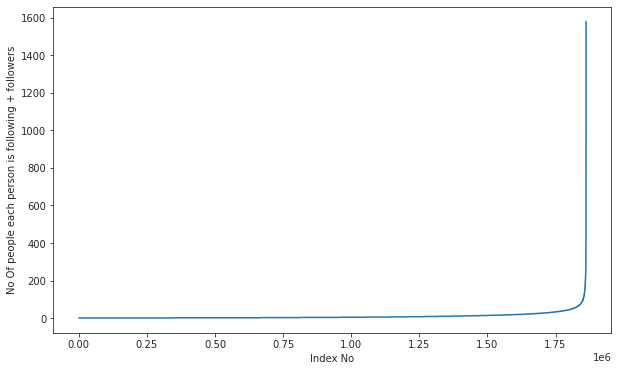

In [33]:
in_out_degree_sort = sorted(in_out_degree)

plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)

plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')

plt.show()

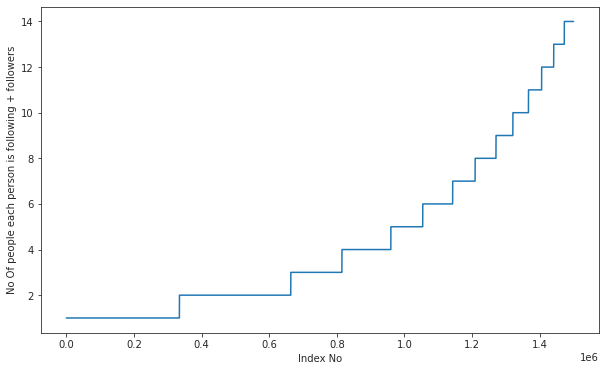

In [34]:
in_out_degree_sort = sorted(in_out_degree)

plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])

plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')

plt.show()

In [35]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [36]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [37]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' Number of persons having minimum no of followers + following')

Min of no of followers + following is 1
334291  Number of persons having minimum no of followers + following


In [38]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 1579
1  persons having maximum no of followers + following


In [39]:
print('No of persons having followers + following less than 10 are',np.sum( in_out_degree < 10))

No of persons having followers + following less than 10 are 1320326


In [40]:
print('No of weakly connected components',len( list(nx.weakly_connected_components(g))) )
count = 0

for i in list(nx.weakly_connected_components(g)):
    if len(i) == 2:
        count +=1
print('weakly connected components with 2 nodes',count)

No of weakly connected components 45558
weakly connected components with 2 nodes 32195


# 2. Posing a problem as classification problem 

## 2.1 Generating some edges which are not present in graph for supervised learning  

* In our dataset only those entries are present which has edge between them hence those can be labeled as 1 but what about the edges that are not present ?

* Hence we have to generated some Bad links from graph which are not in graph and whose shortest path is greater than as if distance is 2 then it implies User U is mutual friend of user V.

* Only taking the vertices whose shortest distance > 2, The reason being there is very high chance that user ui will follow user uj if they are mutual friends. but if we have shortest distance greater than 2 then probability of following each other is quite low.




https://stackoverflow.com/questions/36928958/difference-in-csv-reader-and-pandas-python

https://www.programiz.com/python-programming/reading-csv-files

https://stackoverflow.com/questions/11041405/why-dict-getkey-instead-of-dictkey

In [42]:
%%time

# generating bad edges from given graph

import random

if not os.path.isfile('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/missing_edges_final.p'):
    # getting all set of edges

    r = csv.reader(open('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_woheader.csv','r'))
    edges = dict()

    for edge in r: # if entry is present in dataset then it means edge is present between the two vertices.
        edges[(edge[0], edge[1])] = 1 # Hence assigning a value of 1 in those entries.
        
        
    missing_edges = set([])
    while (len(missing_edges) < 9437519): # we want number of bad edges == number of good edges. 
                                        # so that we have balanced dataset.

        a = random.randint(1, 1862220)   # generating the random vertex in a given range till while loop is terminated.
        b = random.randint(1, 1862220)

        tmp = edges.get((a,b),-1) # edges.get() will return 1 if edge is present else it will return default value(-1 here).

        if tmp == -1 and a!=b: # it will run if there is no edge between two vertices and both vertices are different.

            try: # it will execute if there is path between two randomly generated vertices.
                if nx.shortest_path_length(g,source = a,target = b) > 2: 
                    missing_edges.add((a,b))

                else: # else generate the next set of random vertices.
                    continue  
            
            except: # This will execute there is not any path between two randomly generated vertices which implies
                              # we do not even need to check the shortest distance also as there is no path to begin with  
                    missing_edges.add((a,b))              
        else: # exeucte if randomly generated nodes already had edge between them
            continue

    pickle.dump(missing_edges,open('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/missing_edges_final.p','wb'))

else:
  missing_edges = pickle.load(open('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/missing_edges_final.p','rb'))

print(len(missing_edges))

9437519
CPU times: user 2.09 s, sys: 1.05 s, total: 3.15 s
Wall time: 4.08 s


<h3> Pickling </h3>
    
https://www.datacamp.com/community/tutorials/pickle-python-tutorial

## 2.2 Training and Test data split:  
Removed edges from Graph and used as test data and after removing used that graph for creating features for Train and test data

In [7]:
from sklearn.model_selection import train_test_split

if (not os.path.isfile('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_pos_after_eda.csv')) and (not os.path.isfile('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/test_pos_after_eda.csv')):
    
    # reading total data df
    df_pos = pd.read_csv('/content/drive/MyDrive/Case Studies/Facebook/data/train.csv') # dataset contains only +ve edges 
    df_neg = pd.DataFrame(list(missing_edges), columns = ['source_node', 'destination_node']) # making DataFrame of -ve edges
    
    print("Number of nodes in the graph with edges",    df_pos.shape[0])
    print("Number of nodes in the graph without edges", df_neg.shape[0])
    
    # Train test split 
    # Spiltted data into 80-20 
    # positive links and negative links seperatly because we need positive training data only for creating graph and for feature generation

    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    print('='*60)
    print("Number of nodes in the train data graph with edges",    X_train_pos.shape[0],"=",y_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])

    print('='*60)
    print("Number of nodes in the test data graph with edges",    X_test_pos.shape[0],"=",y_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

    # removing header and saving

    X_train_pos.to_csv('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/test_pos_after_eda.csv',  header=False, index=False)
    X_train_neg.to_csv('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/test_neg_after_eda.csv',  header=False, index=False)

else:
    # Graph from Training data only 
    del missing_edges

In [6]:
%%time
# around 1 min 47 sec.
if (os.path.isfile('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_pos_after_eda.csv')) and (os.path.isfile('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/test_pos_after_eda.csv')):    

    train_graph = nx.read_edgelist('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using = nx.DiGraph(),nodetype = int)
    test_graph  = nx.read_edgelist('/content/drive/MyDrive/Case Studies/Facebook/data/after_eda/test_pos_after_eda.csv', delimiter=',',create_using = nx.DiGraph(),nodetype = int)
  
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs

    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos  = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos  - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)
    print('no of people present in test but not present in train -- ',teY_trN)
    
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

DiGraph with 1780722 nodes and 7550015 edges
DiGraph with 1144623 nodes and 1887504 edges
no of people common in train and test --  1063125
no of people present in train but not present in test --  717597
no of people present in test but not present in train --  81498
 % of people not there in Train but exist in Test in total Test data are 7.1200735962845405 %
CPU times: user 1min 22s, sys: 4.02 s, total: 1min 26s
Wall time: 1min 27s


> we have a cold start problem here

In [ ]:
# final train and test data sets

if (not os.path.isfile('/content/drive/MyDrive/data/after_eda/train_after_eda.csv')) and \
(not os.path.isfile('/content/drive/MyDrive/data/after_eda/test_after_eda.csv')) and \
(not os.path.isfile('/content/drive/MyDrive/data/train_y.csv')) and \
(not os.path.isfile('/content/drive/MyDrive/data/test_y.csv')) and \
(os.path.isfile('/content/drive/MyDrive/data/after_eda/train_pos_after_eda.csv')) and \
(os.path.isfile('/content/drive/MyDrive/data/after_eda/test_pos_after_eda.csv')) and \
(os.path.isfile('/content/drive/MyDrive/data/after_eda/train_neg_after_eda.csv')) and \
(os.path.isfile('/content/drive/MyDrive/data/after_eda/test_neg_after_eda.csv')):
    
    X_train_pos = pd.read_csv('/content/drive/MyDrive/data/after_eda/train_pos_after_eda.csv',  names=['source_node', 'destination_node'])
    X_test_pos  = pd.read_csv('/content/drive/MyDrive/data/after_eda/test_pos_after_eda.csv',   names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('/content/drive/MyDrive/data/after_eda/train_neg_after_eda.csv',  names=['source_node', 'destination_node'])
    X_test_neg  = pd.read_csv('/content/drive/MyDrive/data/after_eda/test_neg_after_eda.csv',   names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])

    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True) # using Pandas.
    y_train = np.concatenate((y_train_pos,y_train_neg))         # using Numpy .

    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
    X_train.to_csv('/content/drive/MyDrive/data/after_eda/train_after_eda.csv',header=False,index=False)
    X_test.to_csv('/content/drive/MyDrive/data/after_eda/test_after_eda.csv',header=False,index=False)

    pd.DataFrame(y_train.astype(int)).to_csv('data/train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('data/test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


In [ ]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)
